# ✍ **Natural Language Processing** (NLP) is a form of:<br> ***sequence to sequence*** or ***vector to vector*** processing.  
<br>

[![Encoder-Decoder](https://drive.google.com/uc?id=1MC7hyeWwCZPpJHtDTml5SbQFWr63JUbp)](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html "NLP")
[![Encoder-Decoder](../ref_images/ref_05_NLP_01.PNG)](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html "NLP")]

<br><br>

## ◾ **Types of Sequence to Squence Processing**
[![Sequence-Sequence](https://drive.google.com/uc?id=12C3Gq5yUwszhcJ8RZpOao5ktz-RAxEMj)](https://karpathy.github.io/2015/05/21/rnn-effectiveness/ "Sequence-Sequence")
[![Sequence-Sequence](../ref_images/ref_05_NLP_02.PNG)](https://karpathy.github.io/2015/05/21/rnn-effectiveness/ "Sequence-Sequence")

<br><br>
## ☝ **Note:** **"Words"** are known as **Tokens** in the context of NLP.

## 🔁 **Recurant Neural Network**

[![RNN](https://drive.google.com/uc?id=1Z8CGP0e7yQ2LQi-qKt9zjtmGUOpaUIlU)](https://colah.github.io/posts/2015-08-Understanding-LSTMs/ "Understanding LSTM Networks")
[![RNN](../ref_images/ref_05_NLP_03.PNG)](https://colah.github.io/posts/2015-08-Understanding-LSTMs/ "Understanding LSTM Networks")

# 🔰====== **Tensorflow: General Construction of a RNN** 🔧

In [41]:
!pip install tensorflow --upgrade > upgrade_log.txt 2>&1

In [42]:
from tensorflow.keras import layers

In [43]:
#--- Create LSTM Model: Example Setup
if False:                                                     #--(dont run code)
#--Setup:
  inputs = layers.Input(shape=(1,), dtype="string")           #input layer
  x = text_vectorizer(input)                                  #turn input sequence to numbers
  x = embedding(x)                                            #create embedding matrix
  x = layers.LSTM(64, activation='tanh')(x)                   #return vector for whole sequence
  outputs = layers.Dense(1, activation='sigmoid')(x)          #create output layer
  model = tf.keras.Model(inputs, outputs, name="LSTM_model")

#--Compile:
  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#--Fit:
  history = model.fit(sentences_train, labels_train, epochs=5)

# 🔰=====  Getting Started 🏁

In [44]:
!wget https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py

--2024-01-21 04:14:42--  https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22933 (22K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  22.40K  --.-KB/s    in 0.001s  

2024-01-21 04:14:42 (25.7 MB/s) - ‘helper_functions.py.1’ saved [22933/22933]



In [45]:
%%bash
wget -a log_dataset.txt https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/datasets/disaster_tweets_train.csv
wget -a log_dataset.txt https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/datasets/disaster_tweets_test.csv

In [46]:
from helper_functions import unzip_files, create_tensorboard_callback, BuildCompileFit, ContinueTraining
import pandas as pd

# 🔰===== Visualize a text dataset  📊

In [47]:
train_df = pd.read_csv('disaster_tweets_train.csv')

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [49]:
train_df['target'].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

Note: Guessing that Each Tweet has Target=1 will result in:
 * Recall=1
 * Precision = 0.42966
 * Accuracy of 0.42966
 * F1 = 0.601


**Number to Beat: <font color='green'>F1=0.601</font>**

In [50]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [51]:
#----Shuffle the data:
train_df = train_df.sample(frac=1.0,random_state=42)

In [52]:
train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


# 🔰===== Split the Data ↖  ↗

In [53]:
from sklearn.model_selection import train_test_split as tts

In [54]:
train_data, validation_data, train_labels, validation_labels = tts(train_df['text'].to_numpy(),
                                                                   train_df['target'].to_numpy(),
                                                                   test_size=0.10,
                                                                   random_state=42)
for dataset in [train_data, validation_data, train_labels, validation_labels]:
  print(len(dataset))

6851
762
6851
762


In [55]:
train_data[0:5], train_labels[0:5]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
       dtype=object),
 array([0, 0, 1, 0, 0]))

# 🔰===== Tokenization VS Embedding:

## 1. Tokenization: A direct mapping from **token** (words,letters, etc) to **numbers** (integers) or **vectors** (One-Hot-Encoding)

> ## Example:
> ##    Machine learning is awesome!
> ##           --> machine = 0, learning = 1, is = 2, awesome = 3 --> [0, 1, 2, 3]
> ##           --> machine = [1, 0 , 0, 0], learning=[0, 1, 0, 0], is=[0, 0, 1, 0], awesome=[0, 0, 0, 1]

### The drawback to this is that the size of the encoding space can become very large very quickly.<br>
### For **One-Hot-Encoding** most of the space will be used to encode zeros.
<br>

## 2. Embedding: A mapping of tokens to vectors such that words that are similar in meaning are closer in the vector space.
> ## Benefits:
> ## a. Limits size of vectors
> ## b. Can be learned
> ## c. Higher level relationships can be encoded by the model



# 🔰===== Tensorflows Vectorization Layer: ↗
## Tensorflow [**Text Vecorization**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) : A preprocessing layer which maps text features to integer sequences.

###The processing of each example contains the following steps:<br>
 1. Standardize each example (usually lowercasing + punctuation stripping)
 2. Split each example into substrings (usually words)
 3. Recombine substrings into tokens (usually ngrams)
 4. Index tokens (associate a unique int value with each token)
 5. Transform each example using this index, either into a vector of ints or a dense float vector.





In [56]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from random import choice,seed

In [57]:
tf.__version__

'2.15.0'

In [58]:
#------- Example of default initialization values
text_vectorization = TextVectorization(max_tokens=None,                             #No Limit
                                       standardize='lower_and_strip_punctuation',   #"Abc def. Ghi Jklmn!" --> "abc def ghi jklmn"
                                       split='whitespace',                          #Splits on spaces and newlines
                                       ngrams=None,                                 #
                                       output_mode='int',                           #Encode to a single integer
                                       output_sequence_length=None,                 #pads to longest length
                                       )

In [59]:
for i in train_data[0:2]:
  print(f'{i} | {i.split()}')

@mogacola @zamtriossu i screamed after hitting tweet | ['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']
Imagine getting flattened by Kurt Zouma | ['Imagine', 'getting', 'flattened', 'by', 'Kurt', 'Zouma']


In [60]:
#---------- Find the Average Word Length of Tweets
wl = [len(i.split()) for i in train_data]           #Word Length (split on whitespaces)
awl = round(sum(wl)/len(train_data))                #Average Word Length
xwl = max(wl)                                       #Max Word Length
nwl = min(wl)
print(f'Average Word Length: {awl} | Min Word Length: {nwl} | Max Word Length: {xwl}')

Average Word Length: 15 | Min Word Length: 1 | Max Word Length: 31


In [61]:
vocab = set()
for sentence in train_data:
  words = set(sentence.split())
  vocab = vocab.union(words)
print(f'Unique Words: {len(vocab)}')

Unique Words: 29552


In [62]:
max_vocab_length = 10**4
max_length = 15
text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       output_mode='int',
                                       output_sequence_length=max_length,
                                       )

In [63]:
#-------------------------- Adapt Method: Computes a vocabulary of string terms from tokens in a dataset.
text_vectorization.adapt(train_data)
example_sentence = 'My Street is Flooding!'
text_vectorization(example_sentence)

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([ 13, 698,   9, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])>

In [64]:
#-------------------------- View the Embedding of a Random Tweet:
seed_num = 5
seed(seed_num)
example_sentence = choice(train_data)
vector_sentence = text_vectorization(example_sentence)
print(f'Original Text: "{example_sentence}"\n')
print(f'Text Vectorized ({len(vector_sentence)}): {vector_sentence}'.replace('\n',''))

Original Text: "Massive Sinkhole Emerges In Brooklyn http://t.co/n3Ow73Oasw http://t.co/Gs9bmplbHH"

Text Vectorized (15): [1639  364 5735    4 1319    1    1    0    0    0    0    0    0    0    0]


In [65]:
#------------------------ View Top N Most/Least Common Words:
words_in_vocab = text_vectorization.get_vocabulary()
n = 10
top_n_words = words_in_vocab[0:n]
bot_n_words = words_in_vocab[-n:]

print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'{n} Most Common words: {top_n_words}')
print(f'{n} Least Common words: {bot_n_words}')

Number of words in vocab: 10000
10 Most Common words: ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']
10 Least Common words: ['painthey', 'painful', 'paine', 'paging', 'pageshi', 'pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# 🔰===== Tensorflows Embeddings Layer: 🛌
## Tensorflow [**Text Embedding**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) : Turns positive integers (indexes) into dense vectors of fixed size.


> This layer can **only be used on positive integer inputs of a fixed range**. <br>Tensorflow's:
  * tf.keras.layers.[TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)
  * tf.keras.layers.[StringLookup](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup)
  * tf.keras.layers.[IntegerLookup](https://www.tensorflow.org/api_docs/python/tf/keras/layers/IntegerLookup)
>
>preprocessing layers can help prepare inputs for an Embedding layer.

In [66]:
max_vocab_length = 10**4                                      #Maximum Unique words
max_length = 15                                               #Use Average Word Length
output_dim = 8*(2**4)                                         #GPU benefits when embedding is divisible by "8"
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=output_dim,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name='Embedding_1')

print(f'output_dim: {output_dim}')

output_dim: 128


# 📏 **RULE OF (8): GPU Core Optimization**


[![Rule of 8](https://drive.google.com/uc?id=1X5zcz_VSdC1O5ybuXpqgVLg8YgAwGDxr)](https://developer.nvidia.com/blog/optimizing-gpu-performance-tensor-cores/ "Embedding Rule of 8")

[![Rule of 8](../ref_images/ref_05_NLP_04.PNG)](https://developer.nvidia.com/blog/optimizing-gpu-performance-tensor-cores/ "Embedding Rule of 8")


In [67]:
seed_num = 5                  #Give a Seed Number
seed(seed_num)                #Set Random Seed for Reproducibility

In [68]:
example_sentence = choice(train_data)                                    #Pick Random Sentence
embedded_sentence = embedding(text_vectorization([example_sentence]))    #Find Senetence Embedding
print(f'Original Text: {example_sentence}\n')                            #Display Original Sentence
print(f'Embedding Shape: {embedded_sentence.shape}')                     #Display Embeding Shape
print(f'Text Vectorized : {embedded_sentence}')                          #Display Embedded Sentence

Original Text: Massive Sinkhole Emerges In Brooklyn http://t.co/n3Ow73Oasw http://t.co/Gs9bmplbHH

Embedding Shape: (1, 15, 128)
Text Vectorized : [[[-0.01886312 -0.02123718 -0.04982924 ...  0.04034055 -0.04340015
   -0.04414302]
  [ 0.00453302  0.0349622  -0.01866039 ...  0.02312889  0.04752399
   -0.01471295]
  [ 0.00342204 -0.04370495 -0.00836723 ... -0.04571264 -0.0276085
   -0.02012364]
  ...
  [ 0.04315353  0.00699322  0.03113511 ... -0.00117471 -0.02375786
    0.01882592]
  [ 0.04315353  0.00699322  0.03113511 ... -0.00117471 -0.02375786
    0.01882592]
  [ 0.04315353  0.00699322  0.03113511 ... -0.00117471 -0.02375786
    0.01882592]]]


# 🔰===== Create a Baseline Model:
### Model: [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
###  Features: [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
 * Term Frequency–Inverse Document Frequency:
    > Statistic that represents word importance within a document, weighted by its importance in the entire dataset.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [70]:
model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()),    #Convert Words to Numbers Using TF-IDF
                    ("clf", MultinomialNB())        #Classifier Model
                    ])

model_0.fit(train_data, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [71]:
baseline_score = model_0.score(validation_data, validation_labels)
print(f'Baseline Model Accuracy: {baseline_score}')

Baseline Model Accuracy: 0.7926509186351706


In [72]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, F1Score

In [73]:
def Evaluate(y_pred,y_true):
  y_pred = y_pred.reshape((-1,1))
  y_true = y_true.reshape((-1,1))
  accuracy = BinaryAccuracy()
  precision = Precision()
  recall = Recall()
  f1score = F1Score(threshold=0.5)

  accuracy.update_state(y_true,y_pred)
  precision.update_state(y_true,y_pred)
  recall.update_state(y_true,y_pred)
  f1score.update_state(y_true,y_pred)

  acc = accuracy.result().numpy()
  prc = precision.result().numpy()
  rcl =  recall.result().numpy()
  f1 = f1score.result().numpy()[0]
  f1a = 2*(prc*rcl)/(prc+rcl)
  results = {'accuracy':acc,
             'precision':prc,
             'recall':rcl,
             'f1':f1,
             'f1a':f1a}

  return results

In [74]:
train_df.target.value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [75]:
validation_pred = model_0.predict(validation_data)    #---Multinomial NaiveBayes
Evaluate(validation_pred, validation_labels)

{'accuracy': 0.79265094,
 'precision': 0.88617885,
 'recall': 0.62643677,
 'f1': 0.7340067,
 'f1a': 0.7340066862430785}

<font color='red'>**F1=0.601**</font>: Previous Number to Beat<br>
<font color='green'>**F1=0.734**</font>: New Number to Beat

# 🔰===== Create A Deep NN Model:

In [76]:
from helper_functions import create_tensorboard_callback
from tensorflow.keras import layers

In [77]:
#------------- Build Model:
inputs = layers.Input(shape=(1,), dtype=tf.string,name='Input')    #-Inputs are 1-D strings: sentences
_x = text_vectorization(inputs)                                    #-Encode Words Into Integers
_x = embedding(_x)                                                 #-Embedding Layer
_x = layers.GlobalMaxPooling1D(name='G_MAXPOOL_1')(_x)
outputs = layers.Dense(1,activation='sigmoid',name='Dense_out')(_x)  #-Create Output Layer
model_1 = tf.keras.Model(inputs,outputs,
                        name='model_1_Dense_1')                      #-Initilize Model

In [78]:
#------------ Review Model:
model_1.summary()

Model: "model_1_Dense_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 G_MAXPOOL_1 (GlobalMaxPool  (None, 128)               0         
 ing1D)                                                          
                                                                 
 Dense_out (Dense)           (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1

In [79]:
#-------------- Create A Tensorboard Callback:
tbcb = create_tensorboard_callback(dir_name='callbacks_Model1', experiment_name='model_1_Dense_1')

Set TensorBoard log files to: callbacks_Model1/model_1_Dense_1/240121_041449


In [80]:
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [81]:
hist_model1 = model_1.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb])

Epoch 1/5
215/215 [==============================] - 16s 71ms/step - loss: 0.1511 - Acc: 0.7066 - Rec: 0.4071 - Prec: 0.8112 - val_loss: 0.1325 - val_Acc: 0.7717 - val_Rec: 0.6006 - val_Prec: 0.8566
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1040 - Acc: 0.8453 - Rec: 0.7451 - Prec: 0.8736 - val_loss: 0.1171 - val_Acc: 0.7835 - val_Rec: 0.6724 - val_Prec: 0.8211
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0724 - Acc: 0.8972 - Rec: 0.8289 - Prec: 0.9223 - val_loss: 0.1204 - val_Acc: 0.7953 - val_Rec: 0.6839 - val_Prec: 0.8380
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0514 - Acc: 0.9336 - Rec: 0.8912 - Prec: 0.9500 - val_loss: 0.1287 - val_Acc: 0.7966 - val_Rec: 0.6925 - val_Prec: 0.8339
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0369 - Acc: 0.9553 - Rec: 0.9285 - Prec: 0.9655 - val_loss: 0.1383 - val_Acc: 0.7940 - val_Rec: 0.7098 - val_Prec: 0.8152


In [82]:
validation_pred = model_1.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 0s 3ms/step


{'accuracy': 0.79396325,
 'precision': 0.8151815,
 'recall': 0.70977014,
 'f1': 0.7588325,
 'f1a': 0.7588325155707898}

<font color='green'>**F1=0.734**</font>: Previous Number to Beat<br>
<font color='red'>**F1=0.727**</font>: New Number

Currently the Multinomial Bayes has the best performance (F1=0.734).

#🔰===== Visualising Learned Word Embeddings:

## Tensorflow: [What is a word embedding?](https://www.tensorflow.org/text/guide/word_embeddings)
  - Word Embedding: a **learned dense vector representation** where similar words have similar encodings
  - This is in contrast to the sparse vector representations of ONE-HOT-ENCODING

## Example [Word Embedding Visualization](https://projector.tensorflow.org/)

## Code for Visualizing Embeddings: [LINK](https://www.tensorflow.org/text/guide/word_embeddings/#:~:text=Retrieve%20the%20trained%20word%20embeddings%20and%20save%20them%20to%20disk)


##Understanding [Word2Vec](https://jalammar.github.io/illustrated-word2vec/)

In [83]:
words_in_vocab = text_vectorization.get_vocabulary()
print('size of vocab: ',len(words_in_vocab))
print('top 10 words: ',words_in_vocab[0:10])

size of vocab:  10000
top 10 words:  ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']


In [84]:
embed_weights = model_1.get_layer('Embedding_1').get_weights()[0]
embed_weights, embed_weights.shape

(array([[ 0.09053878, -0.01979679, -0.04175876, ..., -0.05808197,
         -0.01693152, -0.0715681 ],
        [-0.03356997, -0.02609566, -0.04668349, ..., -0.04709944,
         -0.01885912, -0.02619266],
        [-0.04515345, -0.03782042, -0.0321482 , ..., -0.02604492,
         -0.02856029, -0.05189262],
        ...,
        [-0.04120106, -0.01257972, -0.00356468, ...,  0.03827064,
         -0.03028619, -0.01186157],
        [ 0.01461586, -0.04401938, -0.04215046, ...,  0.01974765,
         -0.04466335, -0.01620302],
        [ 0.04668219, -0.00819565,  0.07622932, ..., -0.03138065,
          0.01132024,  0.00061633]], dtype=float32),
 (10000, 128))

In [85]:
import io

In [86]:
#----------------- Store Embedding Parameters
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [87]:
if 0:
  try:
    from google.colab import files
    files.download('vectors.tsv')
    files.download('metadata.tsv')
  except Exception:
    pass

# # ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

# 📊 **View** Twitter Disaster **Word Embeddings** here ----> [Visualization](https://projector.tensorflow.org/?config=https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/05_NLP/Embeddings/projector_config_240114.json)


[![Word Embeddings](https://drive.google.com/uc?id=1QDSwyqR9VeN8wFkiM57tbMOkrhts7aIq)](https://projector.tensorflow.org/?config=https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/05_NLP/Embeddings/projector_config_240114 "Twitter Disaster Word Embeddings")

[![Word Embeddings](../ref_images/ref_05_NLP_05.PNG)](https://projector.tensorflow.org/?config=https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/05_NLP/Embeddings/projector_config_240114.json "Twitter Disaster Word Embeddings")


# # ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~ ~ ~ ~ ~ ~ ~ ~


# 🔰===== Building an RNN/LSTM Model

- ## **LSTM**: **L**ONG **S**HORT **T**ERM **M**EMORY
- ## Tensorflow [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)

## 🤖 Model 2

In [88]:
#------------- Build Model:
inputs = layers.Input(shape=(1,), dtype=tf.string,name='Input_2')    #-Inputs are 1-D strings: sentences
_x = text_vectorization(inputs)                                      #-Encode Words Into Integers
_x = embedding(_x)                                                   #-Embedding Layer
_x = layers.LSTM(units=64,name='LSTM_1')(_x)  #-LSTM Layer 1
outputs = layers.Dense(1,activation='sigmoid',name='Dense_out_2')(_x)  #-Create Output Layer
model_2 = tf.keras.Model(inputs,outputs,
                        name='model_2_LSTM')                         #-Initilize Model

In [89]:
#------------ Review Model:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 LSTM_1 (LSTM)               (None, 64)                49408     
                                                                 
 Dense_out_2 (Dense)         (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [90]:
#-------------- Create A Tensorboard Callback:
tbcb_2 = create_tensorboard_callback(dir_name='callbacks_Model2', experiment_name='model_2_LSTM')

Set TensorBoard log files to: callbacks_Model2/model_2_LSTM/240121_041533


In [91]:
model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [92]:
hist_model_2 = model_2.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_2])

Epoch 1/5
215/215 [==============================] - 12s 41ms/step - loss: 0.1001 - Acc: 0.8317 - Rec: 0.7147 - Prec: 0.8675 - val_loss: 0.1222 - val_Acc: 0.7927 - val_Rec: 0.6839 - val_Prec: 0.8322
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0622 - Acc: 0.9050 - Rec: 0.8594 - Prec: 0.9128 - val_loss: 0.1491 - val_Acc: 0.7743 - val_Rec: 0.6437 - val_Prec: 0.8235
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0433 - Acc: 0.9387 - Rec: 0.9148 - Prec: 0.9399 - val_loss: 0.1694 - val_Acc: 0.7756 - val_Rec: 0.6753 - val_Prec: 0.8020
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0335 - Acc: 0.9534 - Rec: 0.9364 - Prec: 0.9537 - val_loss: 0.2197 - val_Acc: 0.7756 - val_Rec: 0.6609 - val_Prec: 0.8127
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0243 - Acc: 0.9603 - Rec: 0.9425 - Prec: 0.9636 - val_loss: 0.2943 - val_Acc: 0.7651 - val_Rec: 0.7529 - val_Prec: 0.7380


In [93]:
validation_pred = model_2.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 0s 3ms/step


{'accuracy': 0.76509184,
 'precision': 0.73802817,
 'recall': 0.75287354,
 'f1': 0.74537694,
 'f1a': 0.7453769572681282}

## **Single Layer LSTM:** <br>
<font color='green'>**F1=0.734**</font>: Previous Number to Beat<br>
<font color='red'>**F1=0.718**</font>: New Number

Currently the Multinomial Bayes has the best performance (F1=0.734). <br>
(but performance is *very* close)

## 🤖 Model 3

In [94]:
#------------- Build Model - Try a GRU layer:
inputs = layers.Input(shape=(1,), dtype=tf.string,name='Input_3')    #-Inputs are 1-D strings: sentences
_x = text_vectorization(inputs)                                      #-Encode Words Into Integers
_x = embedding(_x)                                                   #-Embedding Layer
_x = layers.GRU(units=64,name='GRU_1')(_x)                           #-GRU Layer 1
outputs = layers.Dense(1,activation='sigmoid',name='Dense_out_3')(_x)  #-Create Output Layer
model_3 = tf.keras.Model(inputs,outputs,
                        name='model_3_GRU')                         #-Initilize Model

In [95]:
#------------ Review Model:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 GRU_1 (GRU)                 (None, 64)                37248     
                                                                 
 Dense_out_3 (Dense)         (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [96]:
model_3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [97]:
#-------------- Create A Tensorboard Callback:
tbcb_3 = create_tensorboard_callback(dir_name='callbacks_Model3', experiment_name='model_3_GRU')

Set TensorBoard log files to: callbacks_Model3/model_3_GRU/240121_041617


In [98]:
hist_model_3 = model_3.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_3])

Epoch 1/5
215/215 [==============================] - 12s 43ms/step - loss: 0.0532 - Acc: 0.9167 - Rec: 0.8608 - Prec: 0.9388 - val_loss: 0.1761 - val_Acc: 0.7730 - val_Rec: 0.6868 - val_Prec: 0.7888
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0266 - Acc: 0.9631 - Rec: 0.9477 - Prec: 0.9652 - val_loss: 0.2176 - val_Acc: 0.7625 - val_Rec: 0.7040 - val_Prec: 0.7585
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0185 - Acc: 0.9727 - Rec: 0.9648 - Prec: 0.9711 - val_loss: 0.2470 - val_Acc: 0.7690 - val_Rec: 0.6580 - val_Prec: 0.8007
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0159 - Acc: 0.9733 - Rec: 0.9641 - Prec: 0.9731 - val_loss: 0.3430 - val_Acc: 0.7638 - val_Rec: 0.6178 - val_Prec: 0.8206
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0133 - Acc: 0.9777 - Rec: 0.9675 - Prec: 0.9799 - val_loss: 0.4453 - val_Acc: 0.7664 - val_Rec: 0.7155 - val_Prec: 0.7591


In [99]:
validation_pred = model_3.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 0s 4ms/step


{'accuracy': 0.7664042,
 'precision': 0.75914633,
 'recall': 0.7155172,
 'f1': 0.73668635,
 'f1a': 0.7366863766608835}

## **Single Layer GRU:** <br>

<font color='green'>**F1=0.734**</font>: Previous Number to Beat<br>
<font color='red'>**F1=0.729**</font>: New Number

Currently the Multinomial Bayes has the best performance (F1=0.734). <br>
(but performance is *very* close)

## 🤖 Model-4

In [100]:
#------------- Build Model - Try a GRU layer:
inputs = layers.Input(shape=(1,), dtype=tf.string,name='Input_4')    #-Inputs are 1-D strings: sentences
_x = text_vectorization(inputs)                                      #-Encode Words Into Integers
_x = embedding(_x)                                                   #-Embedding Layer
_x = layers.GRU(units=2**9,name='GRU_1',return_sequences=True)(_x)
_x = layers.GRU(units=2**9,name='GRU_2')(_x)
outputs = layers.Dense(1,activation='sigmoid',name='Dense_out_4')(_x)  #-Create Output Layer
model_4 = tf.keras.Model(inputs,outputs,
                        name='model_4_GRU')                         #-Initilize Model

In [101]:
#------------ Review Model:
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 GRU_1 (GRU)                 (None, 15, 512)           986112    
                                                                 
 GRU_2 (GRU)                 (None, 512)               1575936   
                                                                 
 Dense_out_4 (Dense)         (None, 1)                 513       
                                                       

In [102]:
model_4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [103]:
#-------------- Create A Tensorboard Callback:
tbcb_4 = create_tensorboard_callback(dir_name='callbacks_Model4', experiment_name='model_4_LSTM&GRU')

Set TensorBoard log files to: callbacks_Model4/model_4_LSTM&GRU/240121_041702


In [104]:
hist_model_4 = model_4.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_4])

Epoch 1/5
215/215 [==============================] - 16s 43ms/step - loss: 0.0366 - Acc: 0.9531 - Rec: 0.9360 - Prec: 0.9533 - val_loss: 0.2566 - val_Acc: 0.7480 - val_Rec: 0.7270 - val_Prec: 0.7229
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0187 - Acc: 0.9707 - Rec: 0.9637 - Prec: 0.9674 - val_loss: 0.2490 - val_Acc: 0.7520 - val_Rec: 0.7011 - val_Prec: 0.7416
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0153 - Acc: 0.9747 - Rec: 0.9682 - Prec: 0.9725 - val_loss: 0.5839 - val_Acc: 0.7480 - val_Rec: 0.6638 - val_Prec: 0.7549
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0130 - Acc: 0.9771 - Rec: 0.9675 - Prec: 0.9785 - val_loss: 0.4475 - val_Acc: 0.7480 - val_Rec: 0.7385 - val_Prec: 0.7179
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0118 - Acc: 0.9783 - Rec: 0.9696 - Prec: 0.9793 - val_loss: 0.4473 - val_Acc: 0.7572 - val_Rec: 0.7069 - val_Prec: 0.7477


In [105]:
validation_pred = model_4.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 1s 4ms/step


{'accuracy': 0.7572178,
 'precision': 0.74772036,
 'recall': 0.70689654,
 'f1': 0.7267356,
 'f1a': 0.7267355891485567}

## **Double Layer GRU:** <br>
<font color='green'>**F1=0.734**</font>: Previous Number to Beat<br>
<font color='red'>**F1=0.700**</font>: New Number

Currently the Multinomial Bayes has the best performance (F1=0.734). <br>
(However performance is even worse! 😨)

# 🔰===== Using Bi-Directional RNN

## 🤖 Model 5

In [106]:
#------------- Build Model - Try a GRU layer:
inputs = layers.Input(shape=(1,), dtype=tf.string,name='Input_5')    #-Inputs are 1-D strings: sentences
_x = text_vectorization(inputs)                                      #-Encode Words Into Integers
_x = embedding(_x)                                                   #-Embedding Layer
_x = layers.Bidirectional(layer=layers.LSTM(units=64,
                                            name='LSTM_5_1',
                                            return_sequences=False),
                          name='BiDIR_5_1')(_x)
outputs = layers.Dense(1,activation='sigmoid',name='Dense_out_5')(_x)  #-Create Output Layer
model_5 = tf.keras.Model(inputs,outputs,
                        name='model_5_BiDir')                         #-Initilize Model

In [107]:
#------------ Review Model:
model_5.summary()

Model: "model_5_BiDir"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 BiDIR_5_1 (Bidirectional)   (None, 128)               98816     
                                                                 
 Dense_out_5 (Dense)         (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable params: 1378945 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [108]:
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [109]:
#-------------- Create A Tensorboard Callback:
tbcb_5 = create_tensorboard_callback(dir_name='callbacks_Model5', experiment_name='model_5_BiDir')
hist_model_5 = model_5.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_5])

Set TensorBoard log files to: callbacks_Model5/model_5_BiDir/240121_041731
Epoch 1/5
215/215 [==============================] - 14s 44ms/step - loss: 0.0288 - Acc: 0.9545 - Rec: 0.9251 - Prec: 0.9668 - val_loss: 0.2732 - val_Acc: 0.7546 - val_Rec: 0.6523 - val_Prec: 0.7747
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0132 - Acc: 0.9772 - Rec: 0.9658 - Prec: 0.9805 - val_loss: 0.4671 - val_Acc: 0.7415 - val_Rec: 0.7759 - val_Prec: 0.6941
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0111 - Acc: 0.9787 - Rec: 0.9699 - Prec: 0.9800 - val_loss: 0.4723 - val_Acc: 0.7546 - val_Rec: 0.7270 - val_Prec: 0.7333
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0102 - Acc: 0.9819 - Rec: 0.9682 - Prec: 0.9892 - val_loss: 0.6367 - val_Acc: 0.7651 - val_Rec: 0.6868 - val_Prec: 0.7735
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0095 - Acc: 0.9815 - Rec: 0.9678 - Prec: 0.9885 - val_lo

In [110]:
validation_pred = model_5.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 2s 9ms/step


{'accuracy': 0.7493438,
 'precision': 0.7524116,
 'recall': 0.67241377,
 'f1': 0.7101669,
 'f1a': 0.710166878313483}

## **Single BI-Directional LSTM:** <br>
<font color='green'>**F1=0.734**</font>: Previous Number to Beat<br>
<font color='red'>**F1=0.716**</font>: New Number

Currently the Multinomial Bayes has the best performance (F1=0.734). <br>
(but a slight improvement over the prev model!)

# 🔰===== Using 1D Convolution

## ▪ Tensorflow [Conv1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)

## ▪ Creates a feature map for each position in a 1D array as a ***convolution*** of adjacent inputs

[![CONV1D](https://drive.google.com/uc?id=1K2OJY10YKO5EH2H2FyoaYw9RprN2pZL3)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D "1D Convolution")

[![CONV1D](../ref_images/ref_05_NLP_06.PNG)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D "1D Convolution")


## Resource for understanding convolution parameters: [CNN Explainer](https://poloclub.github.io/cnn-explainer/)




In [111]:
embedding_test = embedding(text_vectorization(["this is a test sentence"])) #--Convert target sentence into numbers
conv_1d = layers.Conv1D(filters=64,
                        kernel_size=5,                                     #--This creates ngrams of 5
                        strides=1,                                         #--default stride size
                        activation='relu',
                        padding='same')                                    #--default is 'valid' which will 'shrink' the output dimension

conv_1d_output = conv_1d(embedding_test)                                   #--pass test embedding through conv1D layer
max_pool_1d = layers.GlobalMaxPool1D()                                     #--Initilize a pooling layer: Global Max
max_pool_output = max_pool_1d(conv_1d_output)                              #--return highest value/ most important feature

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 64]), TensorShape([1, 64]))

In [112]:
max_pool_output

<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[0.10822728, 0.04774697, 0.00740575, 0.        , 0.1018158 ,
        0.00925026, 0.03889732, 0.03500224, 0.0646185 , 0.07183141,
        0.07416191, 0.05217604, 0.04144507, 0.        , 0.03833465,
        0.11846293, 0.02213596, 0.03337603, 0.00037845, 0.01277552,
        0.01684605, 0.06946744, 0.04617372, 0.07681554, 0.06133763,
        0.05365325, 0.05544185, 0.02082536, 0.02743443, 0.01634339,
        0.02064336, 0.066269  , 0.00295683, 0.05336908, 0.03952775,
        0.03528599, 0.07271246, 0.02020329, 0.0058409 , 0.03962323,
        0.03267894, 0.03605334, 0.04883489, 0.05759515, 0.03816207,
        0.04649411, 0.11985872, 0.05046119, 0.02055764, 0.06531597,
        0.0637411 , 0.06809497, 0.04277163, 0.01023494, 0.05471322,
        0.09260277, 0.        , 0.03755236, 0.06553059, 0.02004745,
        0.07061946, 0.02242457, 0.06135874, 0.08801839]], dtype=float32)>

## 🤖 Model 6

In [113]:
#------------- Build Model - Try a 1D Conv
inputs = layers.Input(shape=(1,), dtype=tf.string,name='Input_6')    #-Inputs are 1-D strings: sentences
_x = text_vectorization(inputs)                                      #-Encode Words Into Integers
_x = embedding(_x)                                                   #-Embedding Layer
_x = layers.Conv1D(filters=64,
                   kernel_size=5,
                   strides=1,
                   activation='relu',
                   padding='same',
                   name = 'model6_CONV1D_1')(_x)
_x = layers.GlobalMaxPool1D(name='model6_maxpool_1')(_x)
outputs = layers.Dense(1,activation='sigmoid',name='Dense_out_6')(_x)  #-Create Output Layer
model_6 = tf.keras.Model(inputs,outputs,
                        name='model_6_1DConv')                         #-Initilize Model

In [114]:
#--------- View Model Summary:
model_6.summary()

Model: "model_6_1DConv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 model6_CONV1D_1 (Conv1D)    (None, 15, 64)            41024     
                                                                 
 model6_maxpool_1 (GlobalMa  (None, 64)                0         
 xPooling1D)                                                     
                                                                 
 Dense_out_6 (Dense)         (None, 1)              

In [115]:
model_6.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.5,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [116]:
#-------------- Create A Tensorboard Callback:
tbcb_6 = create_tensorboard_callback(dir_name='callbacks_Model6', experiment_name='model_6_Conv1D')
hist_model_6 = model_6.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_6])

Set TensorBoard log files to: callbacks_Model6/model_6_Conv1D/240121_041803
Epoch 1/5
215/215 [==============================] - 15s 51ms/step - loss: 0.0277 - Acc: 0.9658 - Rec: 0.9518 - Prec: 0.9677 - val_loss: 0.2818 - val_Acc: 0.7480 - val_Rec: 0.7069 - val_Prec: 0.7321
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0160 - Acc: 0.9756 - Rec: 0.9702 - Prec: 0.9726 - val_loss: 0.3071 - val_Acc: 0.7507 - val_Rec: 0.7069 - val_Prec: 0.7365
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0140 - Acc: 0.9781 - Rec: 0.9709 - Prec: 0.9776 - val_loss: 0.3724 - val_Acc: 0.7559 - val_Rec: 0.6494 - val_Prec: 0.7793
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0128 - Acc: 0.9797 - Rec: 0.9737 - Prec: 0.9787 - val_loss: 0.3405 - val_Acc: 0.7467 - val_Rec: 0.6868 - val_Prec: 0.7399
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0123 - Acc: 0.9791 - Rec: 0.9740 - Prec: 0.9770 - val_lo

In [117]:
validation_pred = model_6.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 0s 3ms/step


{'accuracy': 0.7467192,
 'precision': 0.741433,
 'recall': 0.68390805,
 'f1': 0.7115097,
 'f1a': 0.7115097166191003}

## **Single 1D Conv Layer:** <br>
<font color='green'>**F1=0.734**</font>: Previous Number to Beat<br>
<font color='red'>**F1=0.711**</font>: New Number

Currently the Multinomial Bayes has the best performance (F1=0.734). <br>

# 🔰================== Using a PRE-Trained Model 🦾

* ## [Tensorflow Hub](https://www.kaggle.com/models?tfhub-redirect=true)

* ## [Universal Sentance Encoder](https://www.kaggle.com/models/google/universal-sentence-encoder)
*   List item



In [118]:
import tensorflow_hub as hub              #---Import Tensorflow Hub for downloading pretrained models

In [119]:
#----------------- Run Example code from Tensorflow Hub
model_URL = "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2"
embed = hub.load(model_URL)
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133019 -0.06338634 -0.01607499 ... -0.0324278  -0.04575738
   0.05370456]
 [ 0.0508086  -0.01652432  0.01573777 ...  0.00976658  0.03170119
   0.01788117]], shape=(2, 512), dtype=float32)


In [120]:
example_embedding = embed([example_sentence])
print(example_sentence)
print(example_embedding.shape)
print(example_embedding[0][0:10])

Massive Sinkhole Emerges In Brooklyn http://t.co/n3Ow73Oasw http://t.co/Gs9bmplbHH
(1, 512)
tf.Tensor(
[-0.00554308  0.03530635  0.06542989 -0.02563918 -0.03041665 -0.03435834
  0.07348422  0.03149497  0.01990616 -0.00410703], shape=(10,), dtype=float32)


In [121]:
#----------------- Store Embedding Parameters
out_v = io.open('USE_vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('USE_metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [122]:
if 0:
  try:
    from google.colab import files
    files.download('USE_vectors.tsv')
    files.download('USE_metadata.tsv')
  except Exception:
    pass

# 🔭 View Vocab Embeddings from Universal Sentence Encoder (USE)

[![Universal Sentence Encoder Embeddings](https://drive.google.com/uc?id=1zjFwszdGOjFdREvZ4UX2HjXRe5akSEj_)](https://projector.tensorflow.org/?config=https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/05_NLP/Embeddings/USE_projector_config_240118.json "Universal Sentence Encoder Embeddings")

[![Universal Sentence Encoder Embeddings](../ref_images/ref_05_NLP_07.PNG)](https://projector.tensorflow.org/?config=https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/05_NLP/Embeddings/USE_projector_config_240118.json "Universal Sentence Encoder Embeddings")




## 🤖 Model 7

In [123]:
USE_layer = hub.KerasLayer(model_URL,
                           input_shape=[], #---USE model allows variable length sentences
                           dtype=tf.string,
                           trainable=False,
                           name="USE")

In [124]:
model_7 = tf.keras.Sequential([USE_layer,
                               layers.Dense(units=1,
                                            activation='sigmoid',
                                            name='model_7_Dense_Output')],
                               name='model_7_USE')

In [125]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 model_7_Dense_Output (Dens  (None, 1)                 513       
 e)                                                              
                                                                 
Total params: 256798337 (979.61 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [126]:
model_7.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [127]:
#-------------- Create A Tensorboard Callback:
tbcb_7 = create_tensorboard_callback(dir_name='callbacks_Model7', experiment_name='model_7')
hist_model_7 = model_7.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_7])

Set TensorBoard log files to: callbacks_Model7/model_7/240121_041909
Epoch 1/5
215/215 [==============================] - 7s 18ms/step - loss: 0.1526 - Acc: 0.7323 - Rec: 0.6469 - Prec: 0.7022 - val_loss: 0.1397 - val_Acc: 0.7756 - val_Rec: 0.6983 - val_Prec: 0.7864
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1296 - Acc: 0.7954 - Rec: 0.7219 - Prec: 0.7818 - val_loss: 0.1275 - val_Acc: 0.7808 - val_Rec: 0.7299 - val_Prec: 0.7768
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1203 - Acc: 0.8024 - Rec: 0.7424 - Prec: 0.7831 - val_loss: 0.1227 - val_Acc: 0.7887 - val_Rec: 0.7213 - val_Prec: 0.7968
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1155 - Acc: 0.8081 - Rec: 0.7485 - Prec: 0.7905 - val_loss: 0.1204 - val_Acc: 0.7979 - val_Rec: 0.7270 - val_Prec: 0.8109
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1127 - Acc: 0.8114 - Rec: 0.7506 - Prec: 0.7958 - val_loss: 0.1

In [128]:
validation_pred = model_7.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 1s 10ms/step


{'accuracy': 0.79658794,
 'precision': 0.7987616,
 'recall': 0.7413793,
 'f1': 0.7690015,
 'f1a': 0.769001499887226}

## **Universal Sentance Encoder:** <br>
<font color='red'>**F1=0.734**</font>: Previous Number to Beat<br>
<font color='green'>**F1=0.773**</font>: New Number

## 🥳 Finally beat the baseline, with a <font color='green'>**5% Improvement**</font>! 🎉 <br>

## 🤖 Model 8

In [129]:
model_8 = tf.keras.Sequential([USE_layer,
                               layers.Dense(units=64,
                                            activation='relu',
                                            name='model_8_D1'),
                               layers.Dense(units=1,
                                            activation='sigmoid',
                                            name='model_8_Dense_Output')],
                               name='model_8_USE')

In [130]:
model_8.summary()

Model: "model_8_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 model_8_D1 (Dense)          (None, 64)                32832     
                                                                 
 model_8_Dense_Output (Dens  (None, 1)                 65        
 e)                                                              
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [131]:
model_8.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [132]:
#-------------- Create A Tensorboard Callback & Fit:
tbcb_8 = create_tensorboard_callback(dir_name='callbacks_Model8', experiment_name='model_8')
hist_model_8 = model_8.fit(x=train_data,
                          y=train_labels,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_8])

Set TensorBoard log files to: callbacks_Model8/model_8/240121_041933
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.1222 - Acc: 0.7862 - Rec: 0.6955 - Prec: 0.7795 - val_loss: 0.1129 - val_Acc: 0.8097 - val_Rec: 0.7787 - val_Prec: 0.7994
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1050 - Acc: 0.8219 - Rec: 0.7554 - Prec: 0.8139 - val_loss: 0.1111 - val_Acc: 0.8176 - val_Rec: 0.7586 - val_Prec: 0.8276
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1004 - Acc: 0.8278 - Rec: 0.7520 - Prec: 0.8285 - val_loss: 0.1089 - val_Acc: 0.8150 - val_Rec: 0.7500 - val_Prec: 0.8286
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0962 - Acc: 0.8367 - Rec: 0.7554 - Prec: 0.8453 - val_loss: 0.1101 - val_Acc: 0.8228 - val_Rec: 0.7672 - val_Prec: 0.8318
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0926 - Acc: 0.8419 - Rec: 0.7639 - Prec: 0.8503 - val_loss: 0.1

In [133]:
validation_pred = model_8.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 1s 10ms/step


{'accuracy': 0.824147,
 'precision': 0.8496732,
 'recall': 0.74712646,
 'f1': 0.7951071,
 'f1a': 0.7951071174264046}

## **Universal Sentance Encoder:** <br>
<font color='red'>**F1=0.773**</font>: Previous Number to Beat<br>
<font color='green'>**F1=0.784**</font>: New Number

## 🙂 Another Improvement!

# 🔰======= Training Data Subset

### ⚡Experiment to see how the model performs when trained on 10% of the data

In [134]:
train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [135]:
train_10_percent = train_df[['text','target']].sample(frac=0.10,random_state=42)
train_sentences_10pct = train_10_percent['text'].to_list()
train_labels_10pct = train_10_percent['target'].to_list()
len(train_sentences_10pct), len(train_labels_10pct)

(761, 761)

In [136]:
#----------- Confirm that split still maintains target representation (ratios)
print(train_df['target'].value_counts(normalize=True))
print(train_10_percent['target'].value_counts(normalize=True))

0    0.57034
1    0.42966
Name: target, dtype: float64
0    0.542707
1    0.457293
Name: target, dtype: float64


## 🤖 Model 9

* Using Tensorflow/Keras [**Clone**](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) 🐑 method<br>
 |"An instance of Model reproducing the behavior of the original model, on top of new inputs tensors, using newly <br>| instantiated weights. The cloned model may behave differently from the original model if a custom clone_function <br>| modifies the layer."

In [137]:
def rename_layers(layer):
  config = layer.get_config()
  config['name'] = config['name'].replace('8','9')
  return layer.__class__.from_config(config)

In [138]:
model_9 = tf.keras.models.clone_model(model_8,clone_function=rename_layers)
model_9._name = model_9._name.replace('8','9')

In [139]:
model_9.summary()

Model: "model_9_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 model_9_D1 (Dense)          (None, 64)                32832     
                                                                 
 model_9_Dense_Output (Dens  (None, 1)                 65        
 e)                                                              
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [140]:
model_9.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [141]:
#-------------- Create A Tensorboard Callback & Fit:
tbcb_9 = create_tensorboard_callback(dir_name='callbacks_Model9', experiment_name='model_9')
hist_model_9 = model_9.fit(x=train_sentences_10pct,
                          y=train_labels_10pct,
                          epochs=5,
                          validation_data=(validation_data,validation_labels),
                          callbacks=[tbcb_9])

Set TensorBoard log files to: callbacks_Model9/model_9/240121_042002
Epoch 1/5
24/24 [==============================] - 4s 51ms/step - loss: 0.1616 - Acc: 0.6820 - Rec: 0.7385 - Prec: 0.6299 - val_loss: 0.1423 - val_Acc: 0.8150 - val_Rec: 0.7874 - val_Prec: 0.8035
Epoch 2/5
24/24 [==============================] - 1s 30ms/step - loss: 0.1310 - Acc: 0.8095 - Rec: 0.7615 - Prec: 0.8104 - val_loss: 0.1170 - val_Acc: 0.8241 - val_Rec: 0.7902 - val_Prec: 0.8185
Epoch 3/5
24/24 [==============================] - 1s 54ms/step - loss: 0.1116 - Acc: 0.8226 - Rec: 0.7845 - Prec: 0.8198 - val_loss: 0.1030 - val_Acc: 0.8386 - val_Rec: 0.8046 - val_Prec: 0.8358
Epoch 4/5
24/24 [==============================] - 1s 42ms/step - loss: 0.1009 - Acc: 0.8344 - Rec: 0.8017 - Prec: 0.8304 - val_loss: 0.0940 - val_Acc: 0.8530 - val_Rec: 0.8132 - val_Prec: 0.8576
Epoch 5/5
24/24 [==============================] - 1s 30ms/step - loss: 0.0936 - Acc: 0.8436 - Rec: 0.8046 - Prec: 0.8459 - val_loss: 0.0868 - val_

In [142]:
validation_pred = model_9.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 1s 11ms/step


{'accuracy': 0.86220473,
 'precision': 0.8738462,
 'recall': 0.81609195,
 'f1': 0.8439822,
 'f1a': 0.843982193288652}

## **Universal Sentance Encoder Trained On Less Data:** <br>
<font color='red'>**F1=0.784**</font>: Previous Number to Beat<br>
<font color='green'>**F1=0.843**</font>: New Number!

## ❓❗ The Model trained on **LESS** data ***outperforms*** 📈 the Model with <font color='red'>10x</font> more data! 😨❗

# #===================💧Data (Information) Leak...

## * Data Leakage is BAD because it is *'cheating on the test'*



In [143]:
#----- The original Train & Validation data was split using Train-Test-Split (tts)
if False:
  train_data, validation_data, train_labels, validation_labels = tts(train_df['text'].to_numpy(),
                                                                    train_df['target'].to_numpy(),
                                                                    test_size=0.10,
                                                                    random_state=42)

#----- But then, the down-sampled (subset) dataset was taken from the FULL dataset randomly
if False:
  train_10_percent = train_df[['text','target']].sample(frac=0.10,random_state=42)

In [144]:
data_leak_tv = [t_sentence in validation_data for t_sentence in train_sentences_10pct]
data_leak_vt = [v_sentence in train_sentences_10pct for v_sentence in validation_data]
print(f'Training/Validation Overlap: {sum(data_leak_tv)/len(data_leak_tv):0.4f}')
print(f'Validation/Training Overlap: {sum(data_leak_vt)/len(data_leak_vt):0.4f}')

Training/Validation Overlap: 1.0000
Validation/Training Overlap: 0.9987


In [145]:
from random import sample
from random import seed

In [146]:
seed(42)
pop_size = len(train_data)
sample_size = int(0.1*pop_size)
subsample_indexes = sample(range(pop_size),k=sample_size)
print(subsample_indexes)

[5238, 912, 204, 6074, 2253, 2006, 1828, 1143, 6033, 839, 5543, 6067, 4467, 712, 4837, 3456, 260, 244, 767, 1791, 1905, 4139, 4931, 217, 4597, 1628, 5865, 5323, 5745, 4464, 3436, 1805, 3679, 4827, 2278, 6630, 53, 6216, 6601, 1307, 5719, 3462, 2787, 2276, 1273, 1763, 6254, 2757, 837, 759, 3112, 792, 2940, 2817, 4945, 2166, 6611, 355, 5977, 3763, 4392, 1022, 3100, 645, 4522, 2401, 6794, 5149, 5066, 2962, 4729, 1575, 5771, 569, 375, 5417, 1866, 6332, 2370, 653, 1907, 827, 3113, 2277, 3714, 5207, 6833, 2988, 1332, 3032, 2910, 1716, 5490, 2187, 5749, 5599, 5308, 584, 4990, 5201, 1401, 4375, 5973, 2005, 1338, 3786, 3108, 2211, 5242, 5637, 4562, 1799, 5608, 2656, 6294, 6356, 458, 1876, 6732, 262, 6594, 2584, 3286, 2193, 542, 1728, 4646, 5881, 2577, 1741, 5369, 4089, 3241, 5266, 3758, 1170, 2169, 2020, 6102, 4598, 4415, 2152, 6119, 4788, 3509, 4780, 3271, 2965, 1796, 1133, 4174, 4042, 744, 6191, 385, 898, 1252, 5140, 1310, 6488, 5574, 3458, 4885, 520, 3152, 3126, 4881, 3834, 4334, 2059, 4532, 

In [147]:
#----- Resample to prevent information leakage by sampling from the training data NOT the full dataset
train_sentences_10pct = train_data[subsample_indexes]
train_labels_10pct = train_labels[subsample_indexes]
len(train_sentences_10pct), len(train_labels_10pct)

(685, 685)

In [148]:
data_leak_tv = [t_sentence in validation_data for t_sentence in train_sentences_10pct]
data_leak_vt = [v_sentence in train_sentences_10pct for v_sentence in validation_data]
print(f'Training/Validation Overlap: {sum(data_leak_tv)/len(data_leak_tv):0.4f}')
print(f'Validation/Training Overlap: {sum(data_leak_vt)/len(data_leak_vt):0.4f}')

Training/Validation Overlap: 0.0029
Validation/Training Overlap: 0.0026


In [149]:
data_leak_tv = [t_sentence in validation_data for t_sentence in train_data]
data_leak_vt = [v_sentence in train_data for v_sentence in validation_data]
print(f'Training/Validation Overlap: {sum(data_leak_tv)/len(data_leak_tv):0.4f}')
print(f'Validation/Training Overlap: {sum(data_leak_vt)/len(data_leak_vt):0.4f}')

Training/Validation Overlap: 0.0034
Validation/Training Overlap: 0.0157


In [150]:
data_leak = [(label,sentence) for label, sentence in zip(train_labels[data_leak_tv],train_data[data_leak_tv])]
print(len(train_data), len(data_leak), sep=' | ')
data_leak.sort(key=lambda v: v[1]) #--sort by sentences
for label, sentence in data_leak:
  print(f'{label} | {sentence}')

6851 | 23
1 | #Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
1 | #Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
1 | #Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
1 | #Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
1 | #Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
1 | #Myanmar  Displaced #Rohingya at #Sittwe point of no return http://t.co/cgf61fPmR0  #Prison like conditions #genocide IHHen MSF Refugees
1 | #SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.
0 |

In [151]:
data_leak = [(label,sentence) for label, sentence in zip(validation_labels[data_leak_vt],validation_data[data_leak_vt])]
print(len(validation_data), len(data_leak),sep=' | ')
for label, sentence in data_leak:
  print(f'{label} | {sentence}')

762 | 12
1 | #foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption
1 | #SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.
1 | #Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
1 | #Myanmar  Displaced #Rohingya at #Sittwe point of no return http://t.co/cgf61fPmR0  #Prison like conditions #genocide IHHen MSF Refugees
1 | USGS reports a M1.94 #earthquake 5km S of Volcano Hawaii on 8/6/15 @ 1:04:01 UTC http://t.co/Njd28pg9Xv #quake
1 | @fewmoretweets all lives matter. Just not a fan of burning down buildings and stealing from your neighbors to 'protest'
0 | Stuart Broad Takes Eight Before Joe Root Runs Riot Against Aussies
1 | .POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4
1 | RT NotExp

## 🤖🔨 Rebuild Model 9 as Model 10

In [152]:
def rename_layers(layer):
  config = layer.get_config()
  config['name'] = config['name'].replace('8','10')
  return layer.__class__.from_config(config)

In [153]:
model_10 = tf.keras.models.clone_model(model_8,clone_function=rename_layers)
model_10._name = model_10._name.replace('8','10')

In [154]:
model_10.summary()

Model: "model_10_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 model_10_D1 (Dense)         (None, 64)                32832     
                                                                 
 model_10_Dense_Output (Den  (None, 1)                 65        
 se)                                                             
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [155]:
model_10.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.1,gamma=2.0),    #-Weights Loss by Difficulty of Predictions
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='Acc'),
                         tf.keras.metrics.Recall(name='Rec'),
                         tf.keras.metrics.Precision(name='Prec')])

In [156]:
#-------------- Create A Tensorboard Callback & Fit:
tbcb_10 = create_tensorboard_callback(dir_name='callbacks_Model10', experiment_name='model_10')
hist_model_10 = model_10.fit(x=train_sentences_10pct,
                          y=train_labels_10pct,
                          epochs=5,
                          validation_data=(validation_data, validation_labels),
                          callbacks=[tbcb_10])

Set TensorBoard log files to: callbacks_Model10/model_10/240121_042020
Epoch 1/5
22/22 [==============================] - 5s 62ms/step - loss: 0.1596 - Acc: 0.7372 - Rec: 0.6399 - Prec: 0.7038 - val_loss: 0.1501 - val_Acc: 0.7559 - val_Rec: 0.6207 - val_Prec: 0.8000
Epoch 2/5
22/22 [==============================] - 1s 31ms/step - loss: 0.1290 - Acc: 0.8321 - Rec: 0.7378 - Prec: 0.8406 - val_loss: 0.1321 - val_Acc: 0.7677 - val_Rec: 0.7126 - val_Prec: 0.7631
Epoch 3/5
22/22 [==============================] - 1s 30ms/step - loss: 0.1083 - Acc: 0.8380 - Rec: 0.7797 - Prec: 0.8229 - val_loss: 0.1248 - val_Acc: 0.7717 - val_Rec: 0.7241 - val_Prec: 0.7636
Epoch 4/5
22/22 [==============================] - 1s 29ms/step - loss: 0.0964 - Acc: 0.8467 - Rec: 0.7622 - Prec: 0.8549 - val_loss: 0.1237 - val_Acc: 0.7756 - val_Rec: 0.7471 - val_Prec: 0.7580
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.0876 - Acc: 0.8715 - Rec: 0.8322 - Prec: 0.8561 - val_loss: 0.1249 - va

In [157]:
validation_pred = model_10.predict(validation_data)
Evaluate(validation_pred, validation_labels)

24/24 [==============================] - 1s 10ms/step


{'accuracy': 0.78346455,
 'precision': 0.7781155,
 'recall': 0.7356322,
 'f1': 0.75627774,
 'f1a': 0.7562777223545065}

## **Universal Sentance Encoder Trained On Less Data (Correctly):** <br>
<font color='red'>**F1=0.784**</font>: Previous Number to Beat<br>
<font color='green'>**F1=0.755**</font>: New Number

## ✅ The performance has declined, but for good reason!

# 🔰============= Comparing all Models

In [158]:
models = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_10]
results = {model.name:Evaluate(model.predict(validation_data,verbose=0),validation_labels) for model in models}
df_results = pd.DataFrame.from_dict(results,orient='index')
df_results

,accuracy,precision,recall,f1,f1a
model_1_Dense_1,0.754593,0.729345,0.735632,0.732475,0.732475
model_2_LSTM,0.761155,0.767742,0.683908,0.723404,0.723404
model_3_GRU,0.758530,0.773333,0.666667,0.716049,0.716049
model_4_GRU,0.754593,0.749226,0.695402,0.721311,0.721311
model_5_BiDir,0.755906,0.781250,0.646552,0.707547,0.707547
model_6_1DConv,0.746719,0.741433,0.683908,0.711510,0.711510
model_7_USE,0.796588,0.798762,0.741379,0.769001,0.769001
model_8_USE,0.824147,0.849673,0.747126,0.795107,0.795107
model_10_USE,0.783465,0.778116,0.735632,0.756278,0.756278


In [159]:
validation_pred = model_0.predict(validation_data)
df_results.loc['baseline']=Evaluate(validation_pred, validation_labels)

In [160]:
df_results.sort_values(by='f1',ascending=False)

,accuracy,precision,recall,f1,f1a
model_8_USE,0.824147,0.849673,0.747126,0.795107,0.795107
model_7_USE,0.796588,0.798762,0.741379,0.769001,0.769001
model_10_USE,0.783465,0.778116,0.735632,0.756278,0.756278
baseline,0.792651,0.886179,0.626437,0.734007,0.734007
model_1_Dense_1,0.754593,0.729345,0.735632,0.732475,0.732475
model_2_LSTM,0.761155,0.767742,0.683908,0.723404,0.723404
model_4_GRU,0.754593,0.749226,0.695402,0.721311,0.721311
model_3_GRU,0.758530,0.773333,0.666667,0.716049,0.716049
model_6_1DConv,0.746719,0.741433,0.683908,0.711510,0.711510
model_5_BiDir,0.755906,0.781250,0.646552,0.707547,0.707547


In [161]:
df_results = df_results.drop('f1a',axis=1)

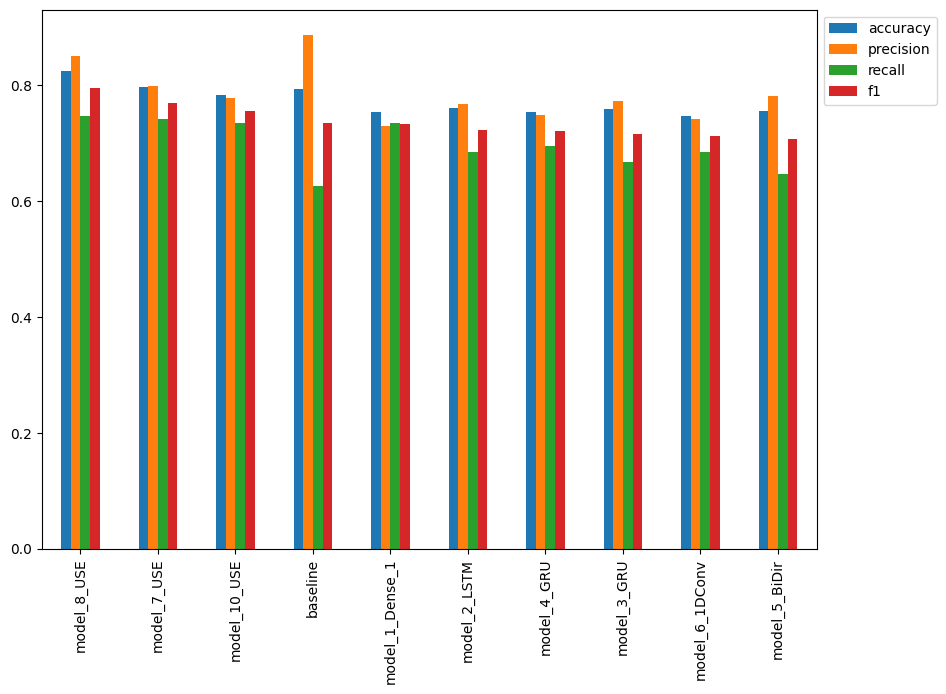

In [162]:
_ = df_results.sort_values(by='f1',ascending=False).plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

# 🔰================== Saving 💾 a Model:

* [**HDF5**](https://docs.hdfgroup.org/hdf5/develop/_intro_h_d_f5.html) Format
* Tensorflow [**'SavedModel'**](https://www.tensorflow.org/guide/saved_model) Format
* Keras

In [163]:
type(USE_layer)

tensorflow_hub.keras_layer.KerasLayer

In [164]:
#---- Save Best Model using h5 format:
print(f'Saving {model_8.name}...')
model_8.save(f'{model_8.name}.h5',save_format='h5')

Saving model_8_USE...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [165]:
#------ Reload Model
model_8_rl = tf.keras.models.load_model('model_8_USE.h5',
                                        custom_objects={'KerasLayer':hub.KerasLayer})

In [166]:
#---- Save Best Model using SavedModel format:
print(f'Saving {model_8.name}...')
model_8.save(f'{model_8.name}_SMF',save_format='tf',include_optimizer=True)

Saving model_8_USE...


In [167]:
#------ Reload Model
model_8_rl = tf.keras.models.load_model('model_8_USE_SMF')

In [168]:
#------ Evlauate (Sanity Check)
model_8_rl.evaluate(validation_data,validation_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.1100 - Acc: 0.8241 - Rec: 0.7471 - Prec: 0.8497


[0.1099710762500763,
 0.8241469860076904,
 0.7471264600753784,
 0.8496732115745544]

# 🔰============== Inspecting Model Performance 🔎:

In [169]:
#--------- Load a provided Pretrained Model (course material)
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2024-01-21 05:31:22--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  39.3MB/s    in 26s     

2024-01-21 05:31:48 (35.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [170]:
#-------- Unzip the File
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [171]:
#-------- Load the pretrained Model
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')

In [172]:
#-------- Check that Model Loaded Correctly
model_6_pretrained.evaluate(validation_data,validation_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [174]:
model_6_pretrained.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [179]:
#----------- Get Predictions on Validation Data:
model_6_prediction_probs = tf.squeeze(model_6_pretrained.predict(validation_data))
model_6_prediction_preds = tf.round(model_6_prediction_probs)
model_6_prediction_preds[0:10]

24/24 [==============================] - 0s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [181]:
df_validation = pd.DataFrame({'text':validation_data,
                              'target':validation_labels,
                              'pred':model_6_prediction_preds,
                              'probs':model_6_prediction_probs})

In [182]:
df_validation.head()

,text,target,pred,probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [210]:
#------ Worst Predictions: Wrongly Labeled & Most Confident
#------ The farther a probability is from 0.50 the more confident the model is in its prediction
df_wrong = df_validation.loc[df_validation['target'] != df_validation['pred'],:].copy()
df_wrong.loc[:,'worst_preds'] = abs(df_wrong['probs']-0.50)
df_wrong = df_wrong.sort_values('worst_preds',ascending=False)

In [212]:
df_wrong.shape

(140, 5)

In [211]:
df_wrong.head(50)

,text,target,pred,probs,worst_preds
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186,0.462814
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949,0.461051
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998,0.461002
233,I get to smoke my shit in peace,1,0.0,0.042087,0.457913
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918,0.456082
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637,0.450363
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597,0.445403
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603,0.445397
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076,0.444924
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303,0.432697
